# DS 2500 HW 1

Due: Fri Feb 10 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

todo: table w/ points


# Part 1 (29 points): Plotting Video Game Data

Using this [Kaggle source](https://www.kaggle.com/datasets/nyagami/video-game-ratings-from-imdb) we've obtained a video game dataset.  Each row represents the average video game made in a particular year.  Features are:
- year 
- rating
    - average rating of all games that year
- votes
    - average number of ratings, per single game, in that year
- total games
    - total number of games (in the dataset) for a given year

The code below loads a numpy array `x` with four columns, each column corresponds to some feature directly above.  Their ordering is given in `col_list` (i.e. `col_list[2] = 'votes'` tells us the third column corresponds to the "average number of ratings given to a single game made in that year").

Using this data, generate the following three graphs:

|                              Part 1.1: hist (7 points)                              |                              Part 1.2: line (11 points)                             |                              Part 1.3: scatter (11 points)                              |
|:--------------------------------------------------------------:|:--------------------------------------------------------------:|:-----------------------------------------------------------------:|
| <img src='https://i.ibb.co/9VmrWFd/part-a-hist.png' width=250> | <img src='https://i.ibb.co/kqYZTwJ/part-a-line.png' width=250> | <img src='https://i.ibb.co/N1VVRnz/part-a-scatter.png' width=250> |

notes:
- plot graphs same order as above
- no need to make them subplots
- use `cmap='jet'` in the last scatter plot to reproduce given colormap
- don't worry about minor differences between your output and the examples above.
    - for example: slightly different x tick labels (the 5, 6, 7 in the first plot)
- please do not load data into pandas (`pd.DataFrame` or `pd.Series`)
    - our goal in this problem is to exercise your ability to plot directly from numpy


In [1]:
# pickle is a module which allows us to store python variables in a file
# (like one pickles cucumbers so they last over the winter ... cute, right?)
import pickle
import pathlib

folder_data = pathlib.Path('data')

# load data
with open(folder_data / 'game_per_year.p', 'rb') as f:
    x, col_list = pickle.load(f)



#### Mea Culpa: Shouldn't we use a `pd.DataFrame` for loading data like this?  (`pd.read_csv()`)
True, you really should.  This array / list combination is relatively awkward to work with.  However I want to exercise your skills plotting directly from numpy here.


In [2]:
# import libararies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

(0.0, 30.0)

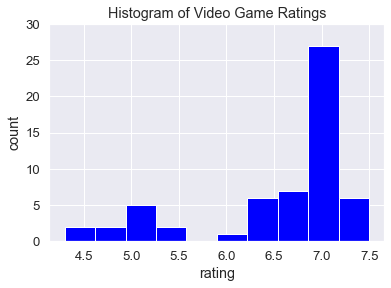

In [3]:
sns.set(font_scale=1.2)

# set a variable for the column with ratings
rating = x[:,1]

# plot the histogram and label
plt.hist(rating, color = 'blue')
plt.xlabel('rating')
plt.ylabel('count')
plt.title("Histogram of Video Game Ratings")
plt.ylim(0,30)
    

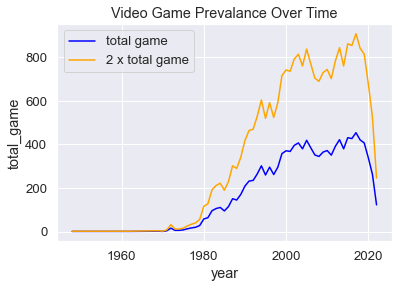

In [4]:
# set variables for the given columns: year, total game
year = x[:,0]
total_games = x[:,3]
d_total_games = total_games*2

# plot the line graph 
plt.plot(year, total_games, color = 'blue', label = "total game")
plt.plot(year, d_total_games, color = "orange", label = "2 x total game")

# label
plt.legend()
plt.xlabel('year')
plt.ylabel('total_game')
plt.title("Video Game Prevalance Over Time")
plt.show()
    

Text(0.5, 1.0, 'Video Games: votes vs ratings')

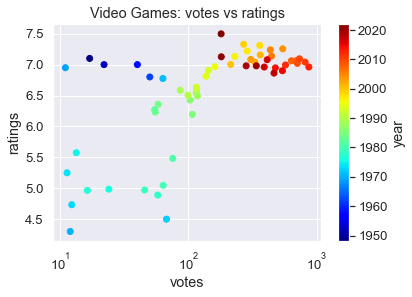

In [5]:
# set needed columns to variables
year = x[:,0]
votes = x[:,2]
ratings = x[:, 1]

# plot 
plt.scatter(votes, ratings, c = year, cmap='jet')

# label
plt.colorbar().set_label('year')
plt.xlabel('votes')
plt.ylabel('ratings')
plt.xscale('log')
plt.title("Video Games: votes vs ratings")

# Part 2: Cereal!

## Part 2.1 (14 points)

Create a dataframe of the following table which is a subset of the data [here](https://www.kaggle.com/datasets/crawford/80-cereals?resource=download).

Please:
- show your final dataframe via the output of a jupyter cell, so it may be graded on gradescope
- create the DataFrame in jupyter, rather than loading a csv file.

| cereal name              | mfr           | calories | cups | rating |
|-------------------|---------------|----------|------|--------|
| Cap'n'Crunch      | Quaker Oats   | 120      | 0.75 | 18     |
| Cocoa Puffs       | General Mills | 110      | 1    | 23     |
| Count Chocula     | General Mills | 110      | 1    | 22     |
| Nutri-grain Wheat | Kelloggs      | 90       | 1    | 60     |
| Shredded Wheat    | Nabisco       | 80       | 1    | 68     |
| Trix              | General Mills | 110      | 1    | 28     |

Note: I couldn't show it in the markdown table, but the first column of the data above, `cereal name`, should be the index of your dataframe.  You can set the name of the index via `df_cereal.index.name = 'cereal name'`.


In [6]:
# import pandas
import pandas as pd

In [7]:
# create a dictionary
# key = name of column; value of that column
cereal_dict = {"mfr": ["Quaker Oats", "General Mills", "General Mills", 
                       "Kelloggs", "Nabisco", "General Mills"],
               "calories": [120, 110, 110, 90, 80, 110],
               "cups": [0.75, 1, 1, 1, 1, 1],
               "rating": [18, 23, 22, 60, 68, 28]}
                       
# create a tuple
index = ("Cap'n'Crunch", "Cocoa Puffs", "Count Chocula", "Nutri-gain Wheat", 
         "Shredded Wheat", "Trix")

In [8]:
# create the dataframe
df_cereal = pd.DataFrame(cereal_dict, index)
df_cereal.index.name = "cereal name"
df_cereal

,mfr,calories,cups,rating
cereal name,,,,
Cap'n'Crunch,Quaker Oats,120,0.75,18
Cocoa Puffs,General Mills,110,1.00,23
Count Chocula,General Mills,110,1.00,22
Nutri-gain Wheat,Kelloggs,90,1.00,60
Shredded Wheat,Nabisco,80,1.00,68
Trix,General Mills,110,1.00,28


## Part 2.2, 2.3 & 2.4:

For the remaining questions in part 2, please:
- construct a series or dataframe object which
    - contains the answer to the question
    - is as simple as possible
- Provide a markdown cell of one sentence which clearly answer each question.
    
We work with this small dataset to ensure you can validate your answers, but **your answer is expected to work on any dataset size**.  For example, don't assume that the only manufacturers are the ones present in this data, programmatically get a list of all manufacturers via 

```python
df_cereal.loc[:, 'mfr'].unique()
```

## Part 2.2 (7 points)
Which cereal has the highest rating?

In [9]:
df_cereal.index[df_cereal.loc[:,'rating'].argmax()]

'Shredded Wheat'

## Part 2.3 (9 points)
Which cereal has the highest calorie density (most calories per cup)?


In [10]:
df_cereal.index[df_cereal.loc[:,'calories'].argmax()]

"Cap'n'Crunch"

## Part 2.4 (11 points)
Which manufacturer has the highest average rating, across all their cereals?


In [11]:
df_cereal["mfr"][df_cereal.loc[:,'rating'].argmax()]

'Nabisco'

## Part 3: Whats the best candy?

Using the candy data ([source](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) & [realted article & video](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)) you'll be asked to investigate a few questions below.  Each response should include:
1. One (or more) graphs which justifies your responses
    - you can make more than one graph if you prefer, the solution uses one graph per part though
    - ideally our graphs are "self-contained" and can be understood without any further context ... this isn't always possible but get as close as possible while keeping it simple
        - axis labels, titles, legends ...
        - make them big and easy to read (`plt.gcf().set_size_inches(15, 5)` or similar)
1. Support each answer with 1 to 4 full sentences which refer to the graphs.
    - for example: "XXXXXX candy can be seen as the most popular because it has some feature in the graph below"
    - your justification should guide a non-technical reader through understanding your graph
        - for example: these dots are higher / more rightward / more red than the others...

### Data
Data dictionary (copied from source)

Header | Description
-------|------------
chocolate | Does it contain chocolate?
fruity | Is it fruit flavored?
caramel | Is there caramel in the candy?
peanutalmondy | Does it contain peanuts, peanut butter or almonds?
nougat | Does it contain nougat?
crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
hard | Is it a hard candy?
bar | Is it a candy bar?
pluribus | Is it one of many candies in a bag or box?
sugarpercent | The percentile of sugar it falls under within the data set.
pricepercent | The unit price percentile compared to the rest of the set.
winpercent | The overall win percentage according to 269,000 matchups.


clarifying note: `winpercent` represents the percentage of times people preferred a particular candy among all binary survey questions it was included in (e.g. "Do you prefer 100 grand or 3 musketeers?").



In [12]:
import pandas as pd

df_candy = pd.read_csv(folder_data / 'candy-data.csv')
df_candy.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Part 3.1 (15 points): chocolate / fruity / caramel


Consider the groups of candies which are categorized as:
- chocolate
- caramel
- fruity

in the table above.

Assuming that `winpercent` is an appropriate estimate of candy popularity, fill in the blanks of each statement below using one of the three candy groups (hint: each group used once).

- _______ candies are typically the most popular
- _______ candies are typically the least popular
- _______ candies are the most inconsistent among the group, some candies in the group are popular while others are quite unpopular


### Response based on the below graphs
CHOCOLATE candies are typically the most popular.

FRUITY candies are typically the least popular.

CARAMEL candies are the most inconsistent among the group, some candies in the group are popular while others are quite unpopular

Based on the graphs below, it has a bell distribution shape. The "Chocolate" chart has counts ranging between 35% to 85% winning percentage with majority above 50%. On the "Caramel" chart, we see that it has the counts ranging from 35% to 80%. There are some popular candies and some unpopular candies. Lastly, on the "Fruity" chart, there is a bell-distribution shape with counts ranging from 25% to 65% with majority of the counts in 50% and under.

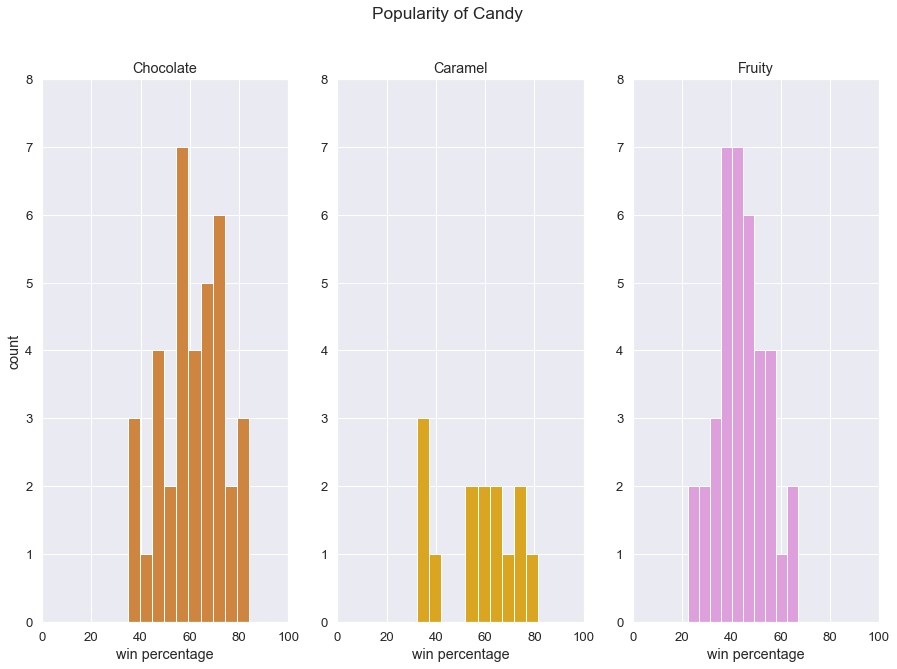

In [13]:
candy_list = ['Chocolate', 'Caramel', 'Fruity']

for candy_idx in range(3):    
    # boolean index to get chocolate, caramel, fruity (respectively)
    bool_choco = df_candy["chocolate"] == 1
    df_choco = df_candy.loc[bool_choco, :]

    bool_cara = df_candy["caramel"] == 1
    df_cara = df_candy.loc[bool_cara, :]

    bool_fru = df_candy["fruity"] == 1
    df_fru = df_candy.loc[bool_fru, :]
    
    # plot subplot for chocolate
    plt.subplot(1, 3, 1)
    plt.hist(df_choco['winpercent'], color = 'peru')
    plt.xlim(0,100)
    plt.ylim(0,8)
    plt.xlabel('win percentage')
    plt.ylabel('count')
    plt.gca().title.set_text('Chocolate')

    # plot subplot for caramel
    plt.subplot(1, 3, 2)
    plt.hist(df_cara['winpercent'], color = 'goldenrod')
    plt.xlim(0,100)
    plt.ylim(0,8)
    plt.xlabel('win percentage')
    plt.gca().title.set_text("Caramel")

    # plot subplot for fruity
    plt.subplot(1, 3, 3)
    plt.hist(df_fru['winpercent'], color = 'plum')
    plt.xlim(0,100)
    plt.ylim(0,8)
    plt.xlabel('win percentage')
    plt.gca().title.set_text("Fruity")


#titles for subplots
plt.suptitle('Popularity of Candy') 
# resizes the whole figure 
plt.gcf().set_size_inches((15, 10))

# Part 3.2 (15 points)

Are popular candies more expensive?

Feel free to give a "soft" answer here if you feel its appropriate (e.g. "pretty much", "a tiny bit").  You needn't respond with a hard yes / no.


### Response:
Based on the number of stars, popular candies are more expensive. However, there are a few cheap candies that are popular too.

In [14]:
# set variable to specific columns
popular = df_candy["winpercent"]
price = df_candy["pricepercent"]

Text(0.5, 1.0, 'Popularity vs Price')

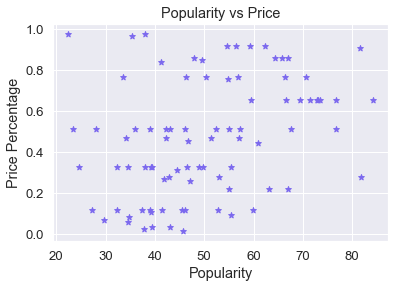

In [15]:
# plot & label
plt.scatter(popular, price, marker = "*", color = "mediumslateblue")
plt.xlabel("Popularity")
plt.ylabel("Price Percentage")
plt.title("Popularity vs Price")

### Part 3.3 (+3 points)

Among all the different candy varities in `feat_list` whats the cheapest way to get as many calories as possible?

hints: 
- this question is an adventure, it may take a bit more effort than the other two
- strictly speaking, you can't answer this question from the data ... what assumptions do we need to make?  Explicitly write them out
- have fun!


In [16]:
feat_list = ('chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus')
